# Overview

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from gatzzt import diff_unique

In [3]:
df_train = pd.read_csv('data/sales_train.csv.gz', compression='gzip')
df_test = pd.read_csv('data/test.csv.gz', compression='gzip')
df_shops = pd.read_csv('data/shops.csv')
df_item_categories = pd.read_csv('data/item_categories.csv')
df_items = pd.read_csv('data/items.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv.gz',compression='gzip')

In [ ]:
df_items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [ ]:
l = list(df_item_categories.item_category_name)
l_cat = l

for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'


df_item_categories['bigcat'] = l_cat
df_item_categories.head()

In [ ]:
df_item_categories.to_csv('data/df_item_bigcat.csv', index=False)

In [ ]:
df_train = pd.merge(df_train, df_items)
df_train = pd.merge(df_train, df_item_categories)
df_train.head()

In [ ]:
df_test = pd.merge(df_test, df_items)
df_test = pd.merge(df_test, df_item_categories)
df_test.head()

In [ ]:
df_train.to_csv('data/df_train_merge.csv', index=False)

In [ ]:
df_test.to_csv('data/df_test_merge.csv', index=False)

In [ ]:
for col in ['shop_id', 'item_id', 'item_category_id']:
    d1, d2 = diff_unique(df_train[col], df_test[col])
    print(col, len(d1), len(d2))

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format
df_train.describe()

In [ ]:
df_train['date_formatted'] = pd.to_datetime(df_train.date, format="%d.%m.%Y")
df_train[['day','month','year']] = df_train.date.str.split('.',expand=True)
df_train['date_month'] = (df_train.year + df_train.month).astype(str)
# df_train['date_month'] = pd.to_datetime(df_train.date_month, format="%Y%m") 
df_train['sales'] = df_train.item_price * df_train.item_cnt_day

In [ ]:
df_test.describe()

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(25,10))
df_train.date_block_num.hist(ax=axes[0][0])
df_train[df_train['item_cnt_day'] < 10].item_cnt_day.hist(ax=axes[0][1])
np.log(df_train['item_price']).hist(ax=axes[1][0])
df_train.sales.hist(ax=axes[1][1])

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(33,5))

df_train.year.value_counts().sort_index().plot.bar(ax=axes[0],title='year')
df_train.month.value_counts().sort_index().plot.bar(ax=axes[1],title='month')
df_train.day.value_counts().sort_index().plot.bar(ax=axes[2],title='day')

In [ ]:
df_train.groupby('date_formatted').agg({"item_cnt_day": "sum"}).plot(figsize=(15,6),title="Items transacted per day")

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(33,5))

df_train.groupby('year').item_cnt_day.sum().plot.bar(figsize=(15,6),title="Total Items transacted each year", ax=axes[0])
df_train.groupby('year').item_cnt_day.mean().plot.bar(figsize=(15,6),title="Average item count per transaction each year", ax=axes[1])

In [34]:
range(len(tmp))

range(0, 34)

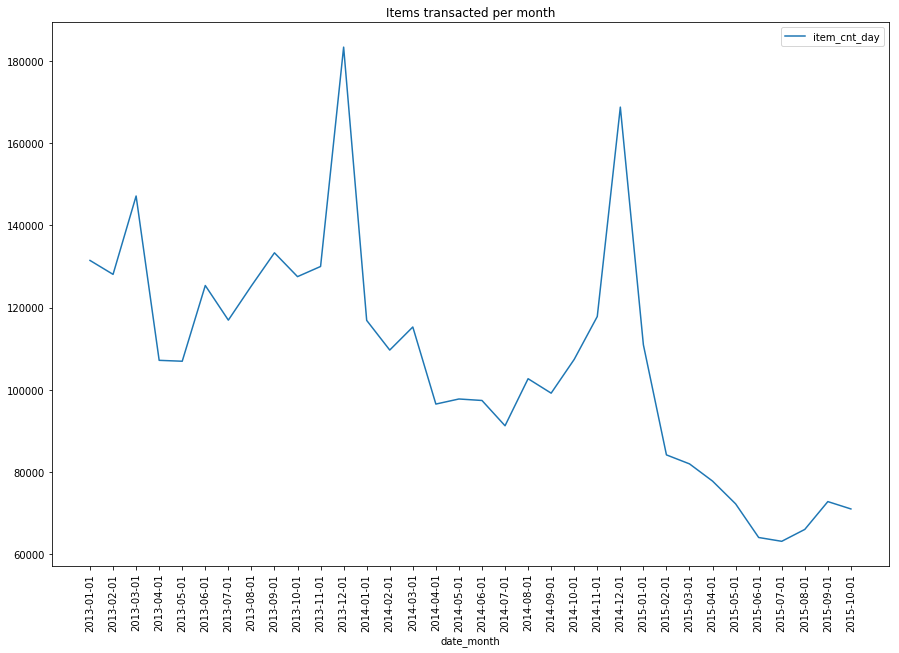

In [41]:
tmp = df_train.groupby('date_month').agg({"item_cnt_day": "sum"})
tmp.index = tmp.index.astype(str)
ax = tmp.plot(figsize=(15,10),title="Items transacted per month",rot=90)
ax.set_xticks(range(len(tmp)));
ax.set_xticklabels([item for item in tmp.index.tolist()], rotation=90);
# df_train.groupby('date_month').agg({"sales": "sum"}).plot(title="sales per month", ax=ax, secondary_y=True)

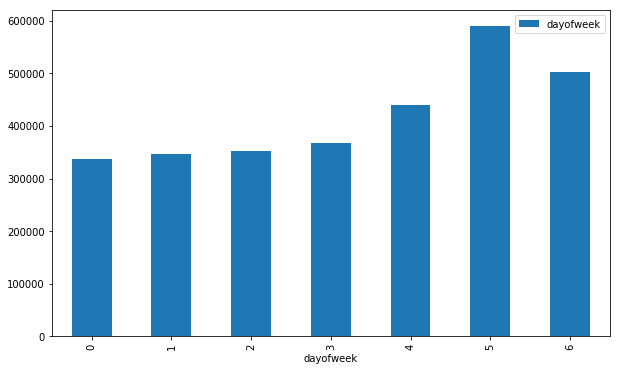

In [17]:
df_train['dayofweek'] = df_train.date_formatted.dt.dayofweek # The day of the week with Monday=0, Sunday=6
df_train.groupby("dayofweek").agg({"dayofweek": "count"}).plot.bar(figsize=(10, 6));

[Text(0,0.5,'average item_cnt_day'), Text(0.5,0,'date month')]

[Text(0,0.5,'sum item_cnt_day'), Text(0.5,0,'date month')]

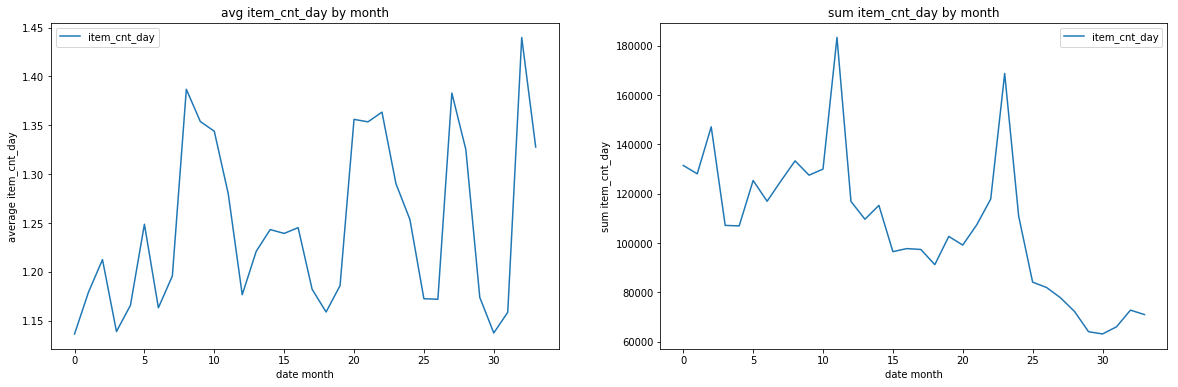

In [18]:
fig, axes = plt.subplots(1,2, figsize=(25,5))
ax = df_train.groupby('date_month').item_cnt_day.mean().reset_index().plot(x_compat=True,title="avg item_cnt_day by month", figsize=(20,6), ax=axes[0])
ax.set(xlabel='date month', ylabel='average item_cnt_day')

ax = df_train.groupby('date_month').item_cnt_day.sum().reset_index().plot(x_compat=True,title="sum item_cnt_day by month", figsize=(20,6), ax=axes[1])
ax.set(xlabel='date month', ylabel='sum item_cnt_day')

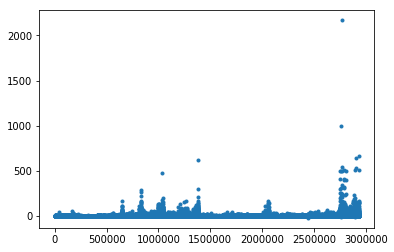

In [19]:
plt.plot(df_train.item_cnt_day,'.')

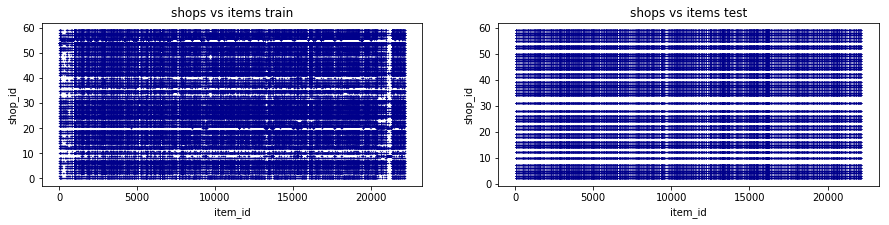

In [20]:
# plot items for each shop -- training set vs test set
fix, axes = plt.subplots(1,2,figsize=(15,3))

df_train.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='DarkBlue', s = 0.1, ax=axes[0], title="shops vs items train")
df_test.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='DarkBlue', s = 0.1, ax=axes[1], title="shops vs items test")

# item and category

In [21]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,big_cats,date_formatted,day,month,year,date_month,sales,dayofweek
0,02.01.2013,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-02,02,01,2013,201301,999.00,2
1,23.01.2013,0,24,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-23,23,01,2013,201301,999.00,2
2,20.01.2013,0,27,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-20,20,01,2013,201301,999.00,6
3,02.01.2013,0,25,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-02,02,01,2013,201301,999.00,2
4,03.01.2013,0,25,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Movie,2013-01-03,03,01,2013,201301,999.00,3


In [22]:
df_train_month_item = df_train.groupby(['item_id', 'date_month']).agg({"item_cnt_day": "sum", "sales": "sum"})
df_train_month_item.head()

item_cnt_day                sales
item_id date_month                                          
0       201409                     1.00                58.00
1       201404                     2.00             8,980.00
        201407                     1.00             4,490.00
        201408                     1.00             4,490.00
        201409                     1.00             4,490.00

/Users/liew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


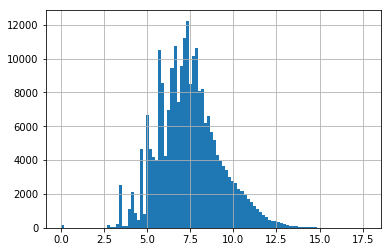

In [23]:
np.log(1 + df_train_month_item['sales']).hist(bins=100)

In [24]:
df_train_month_cat = df_train.groupby(['item_category_id', 'date_month']).agg({"item_cnt_day": "sum", "sales": "sum"})
df_train_month_cat.head()

item_cnt_day                sales
item_category_id date_month                                          
0                201301                     1.00               148.00
                 201302                     1.00                93.00
                 201304                     1.00                22.40
1                201301                     1.00               148.00
                 201302                     1.00               283.00

In [25]:
dict_cat_name = df_item_categories.set_index('item_category_id')['item_category_name'].to_dict()

/Users/liew/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


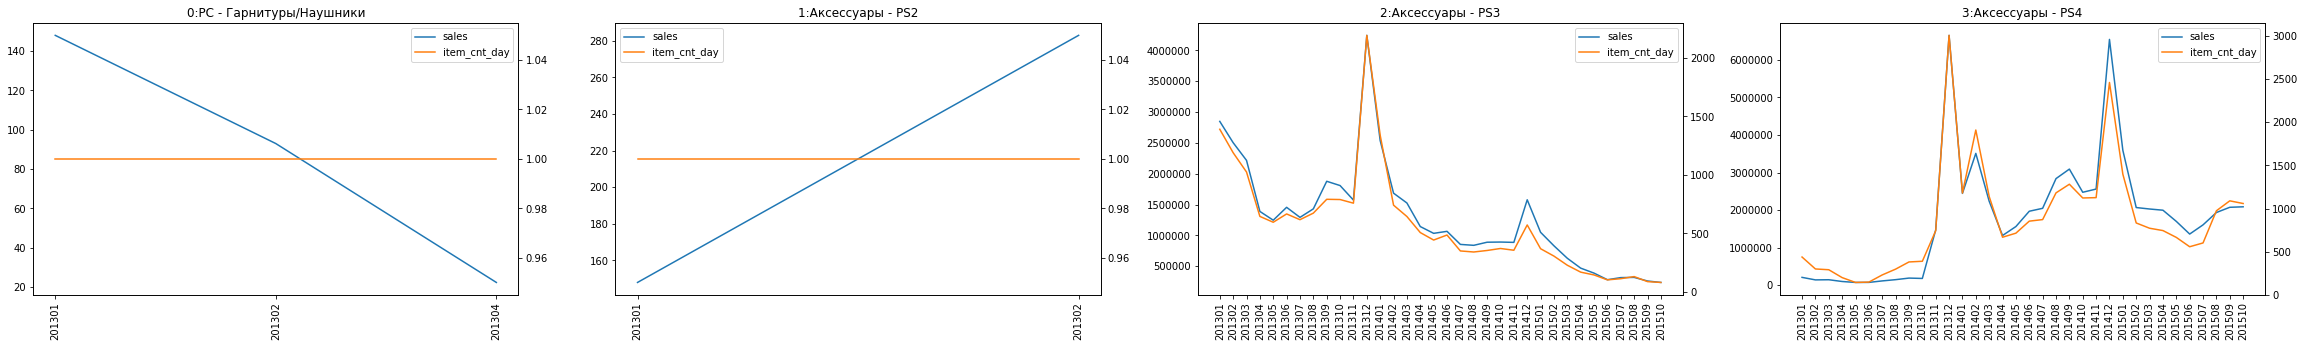

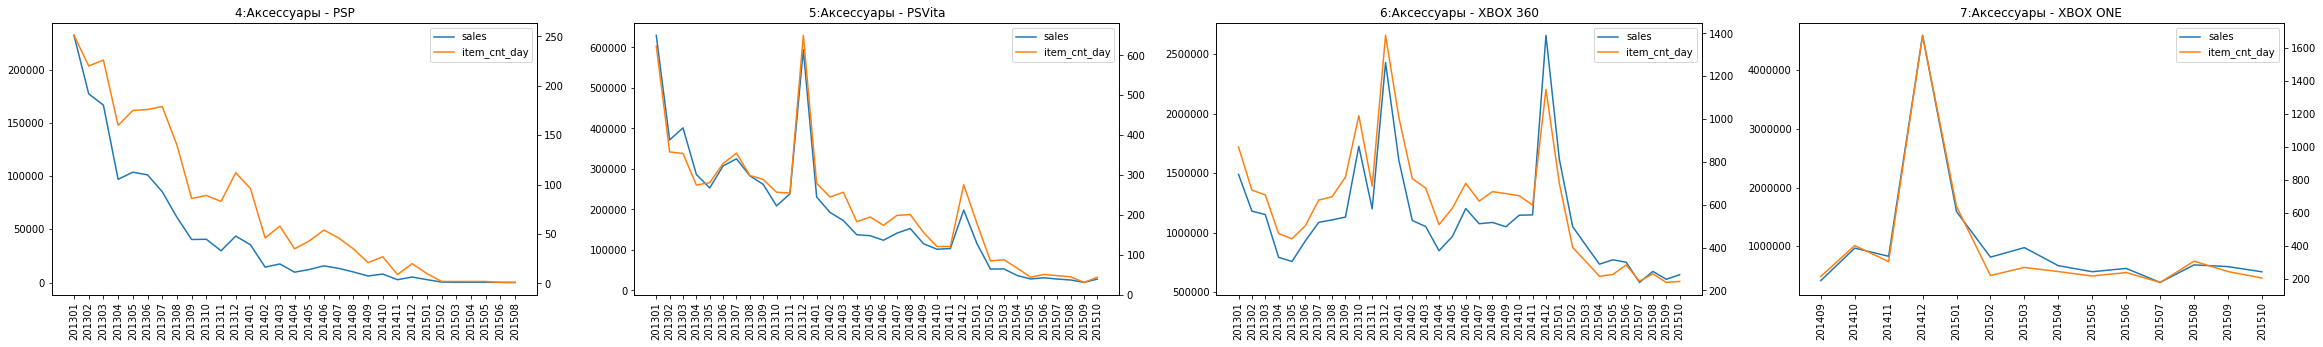

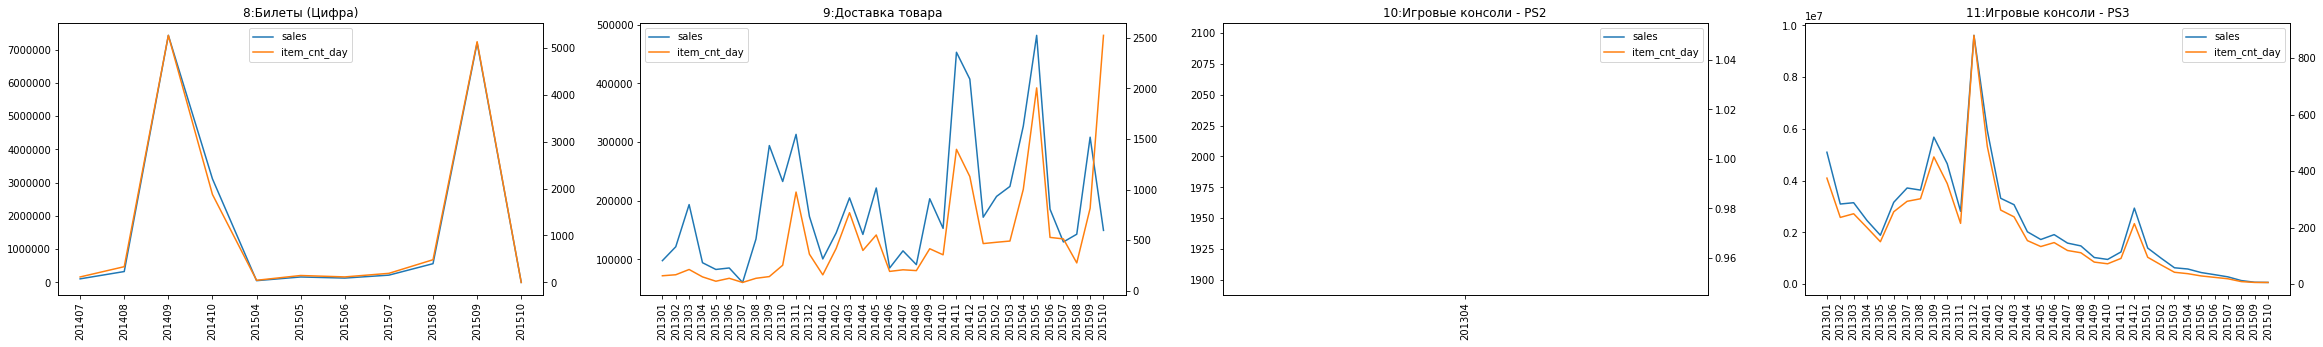

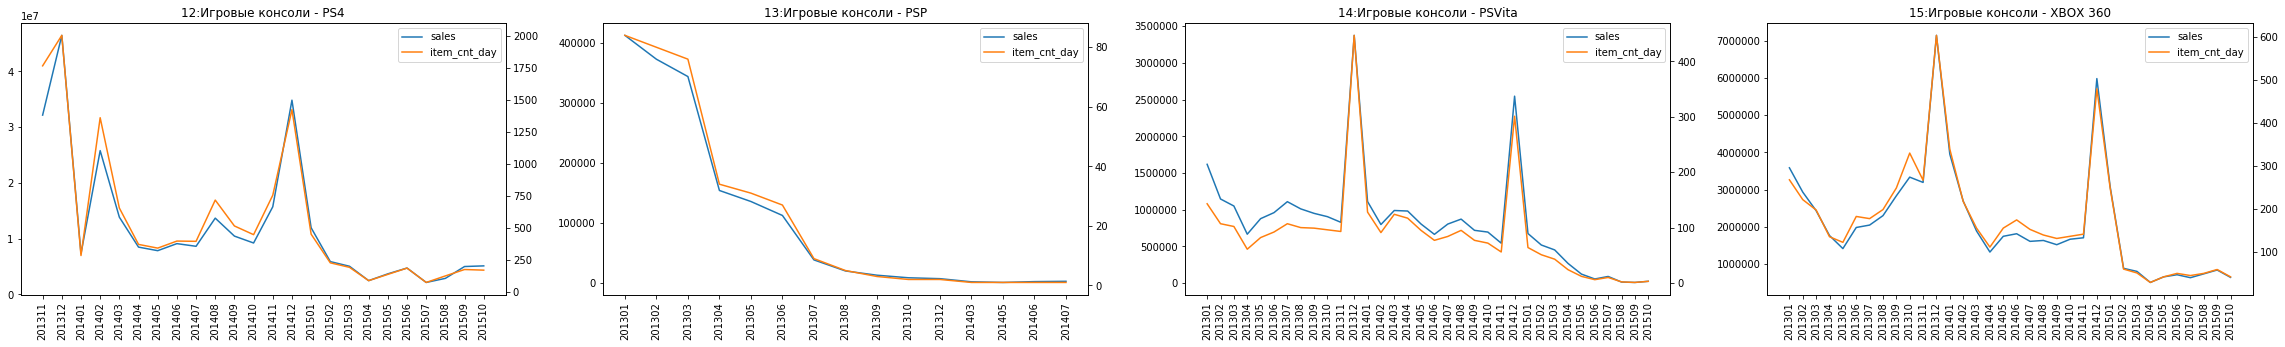

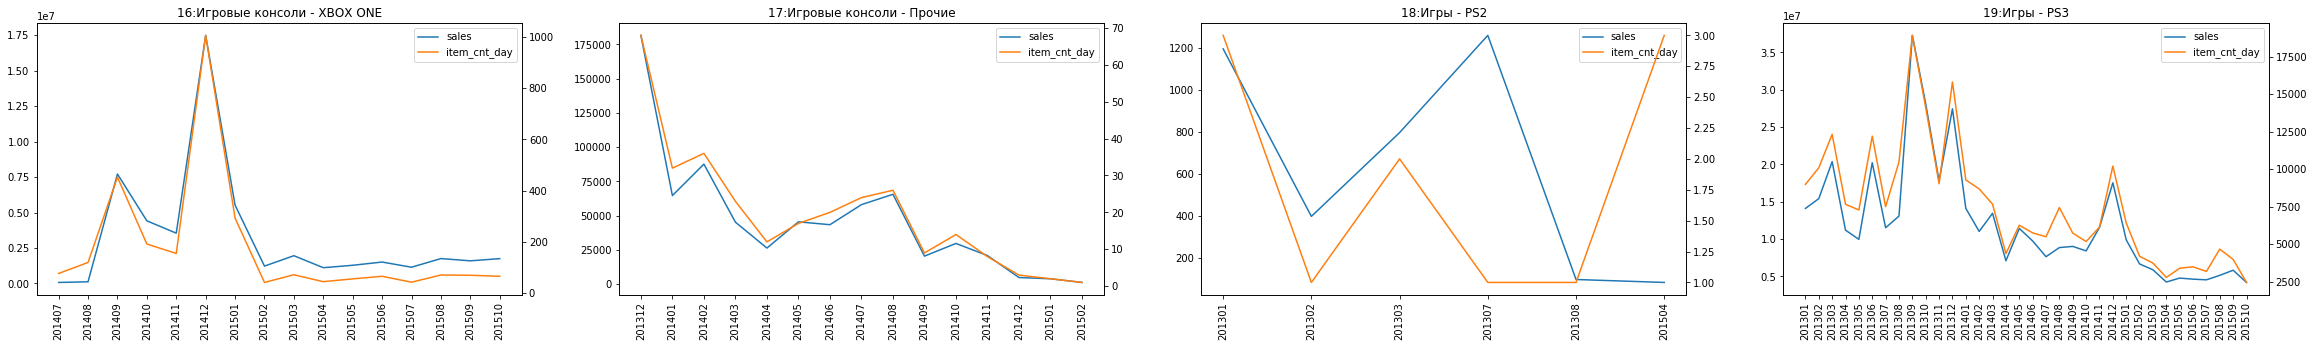

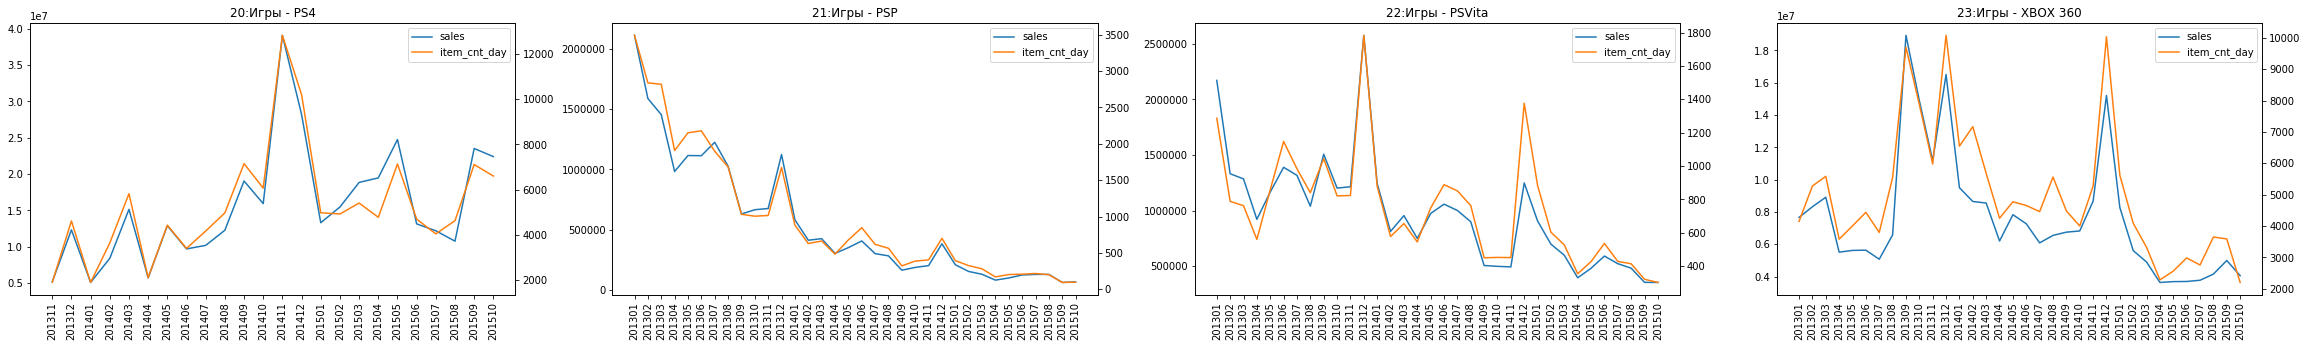

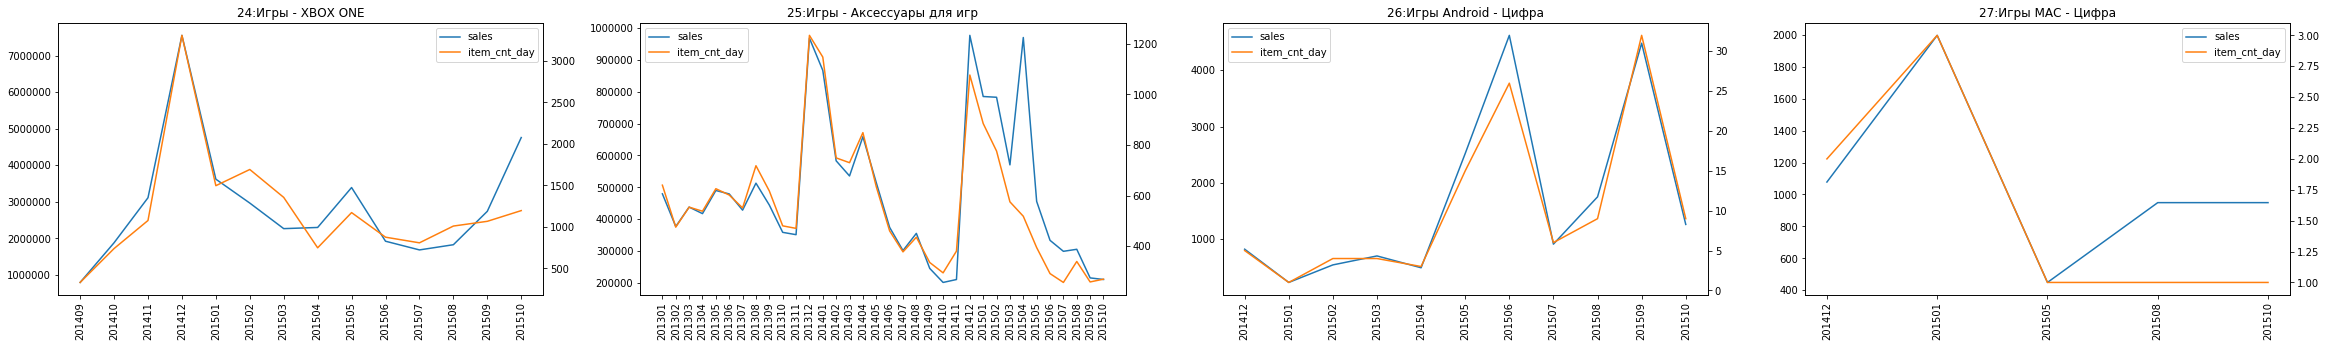

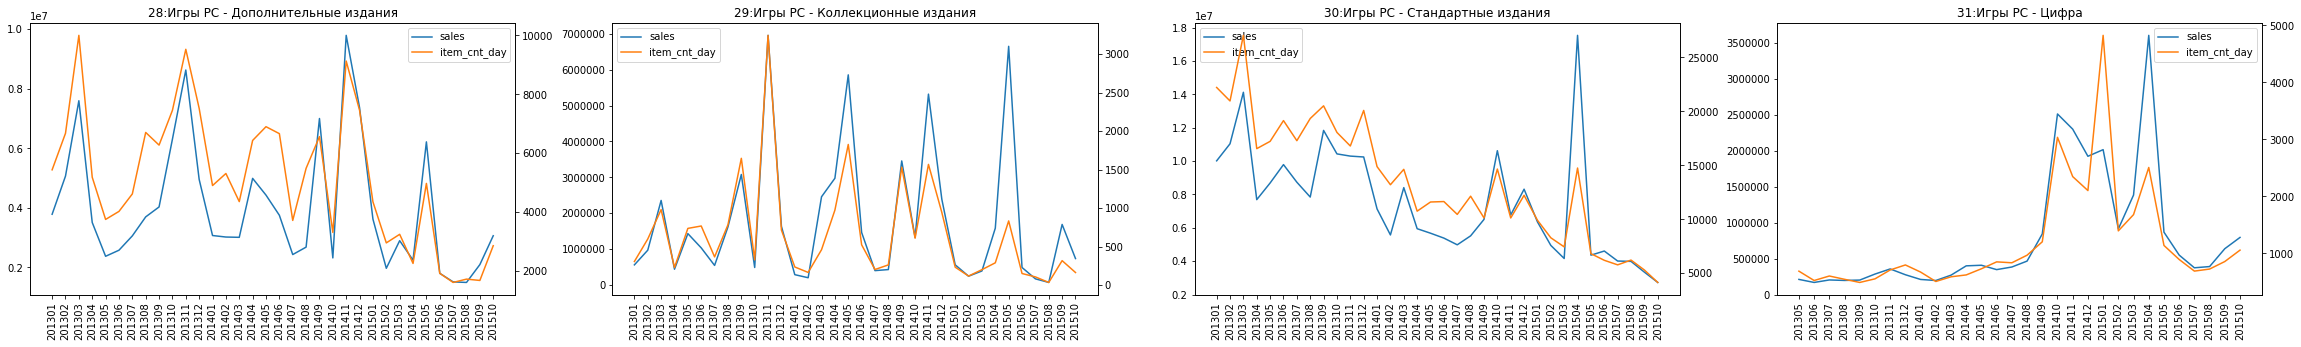

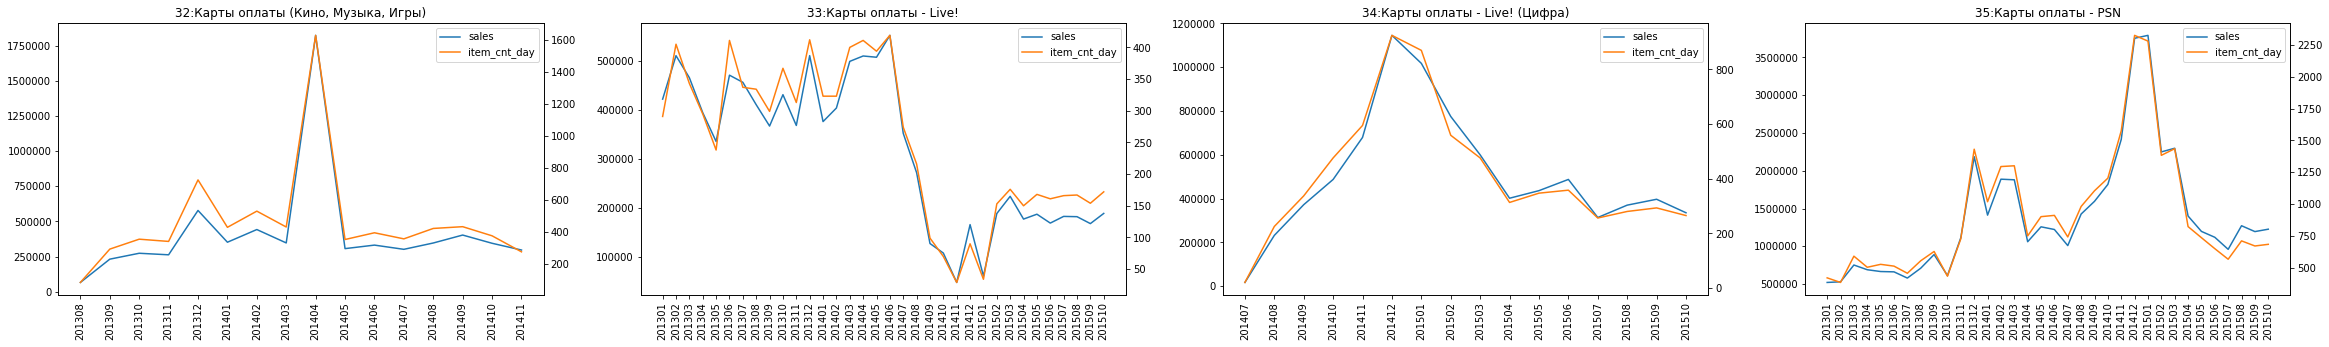

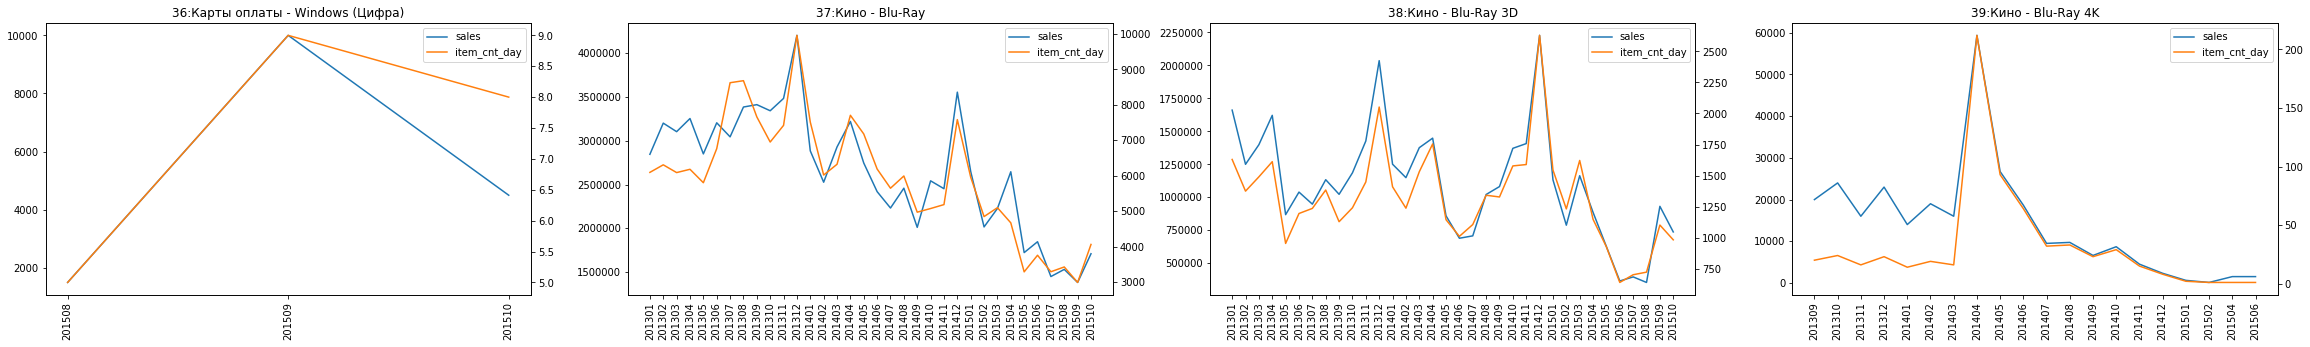

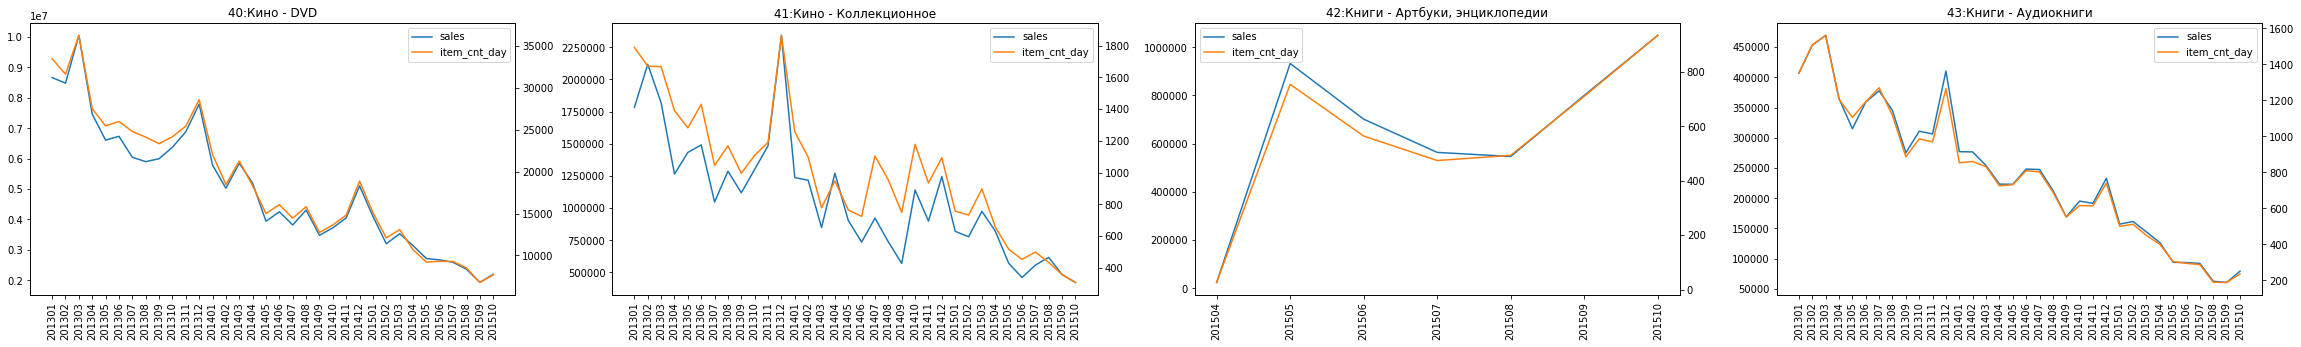

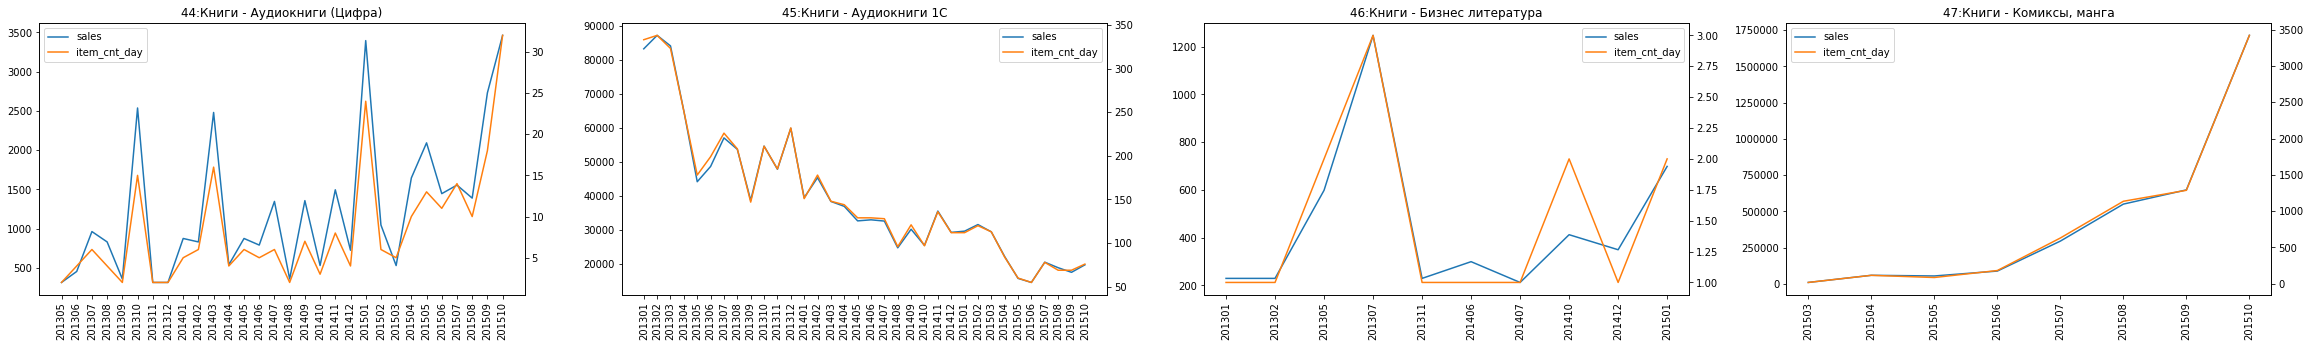

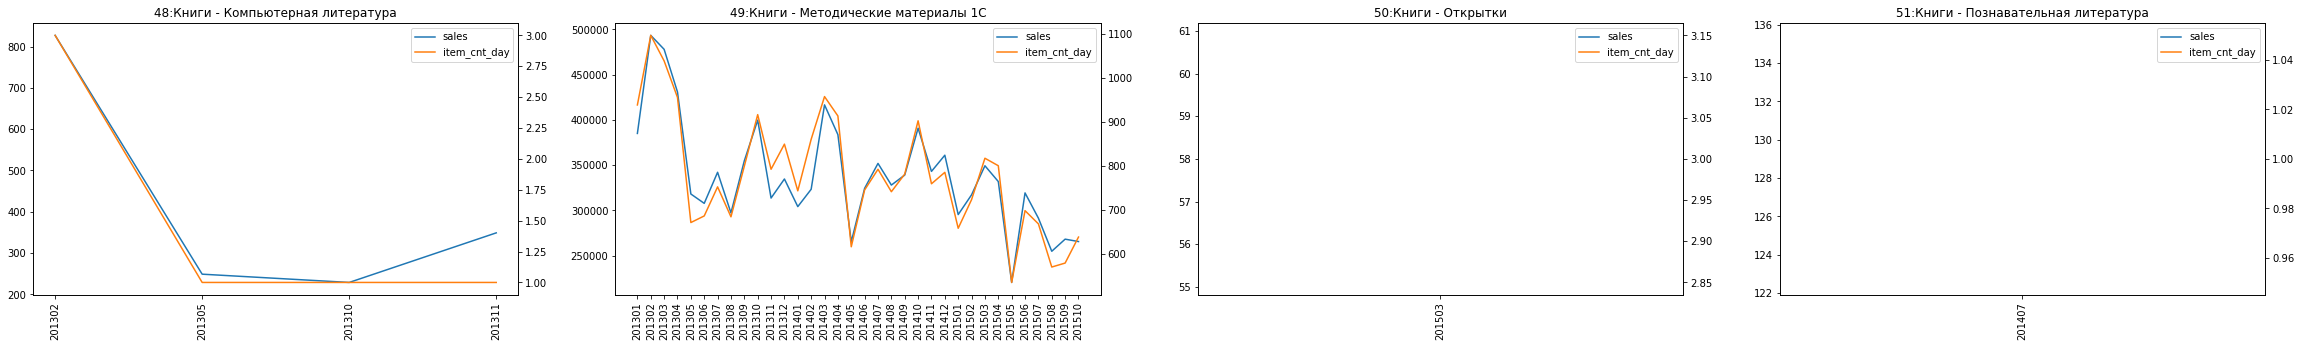

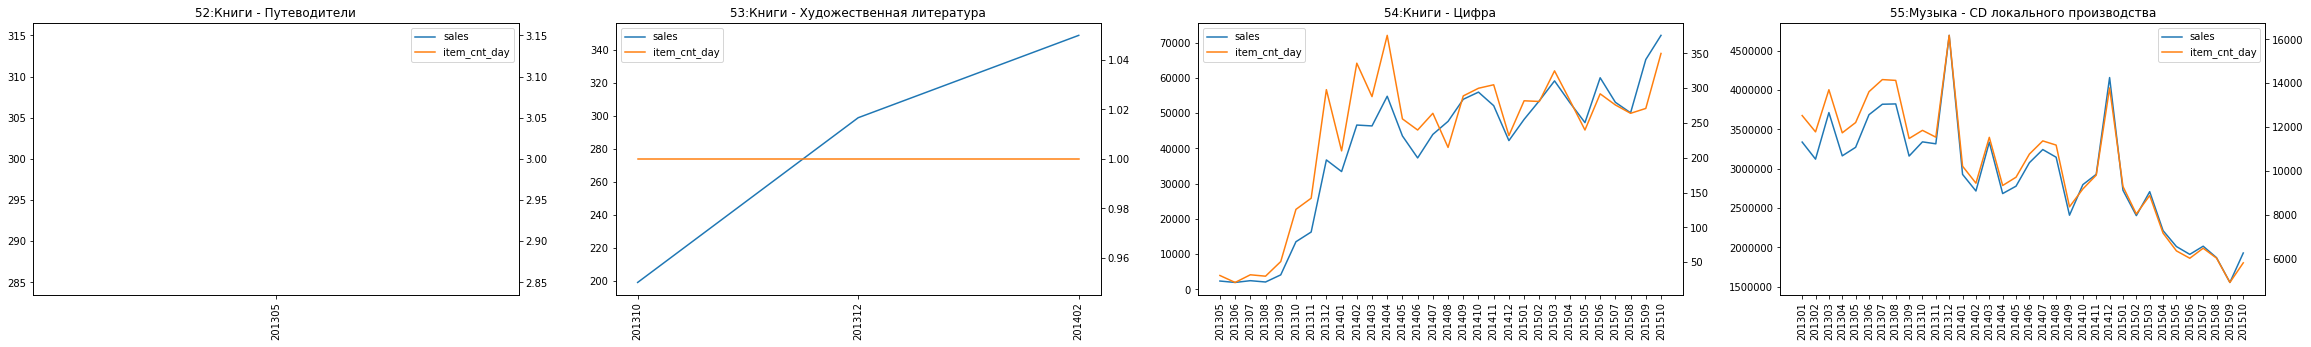

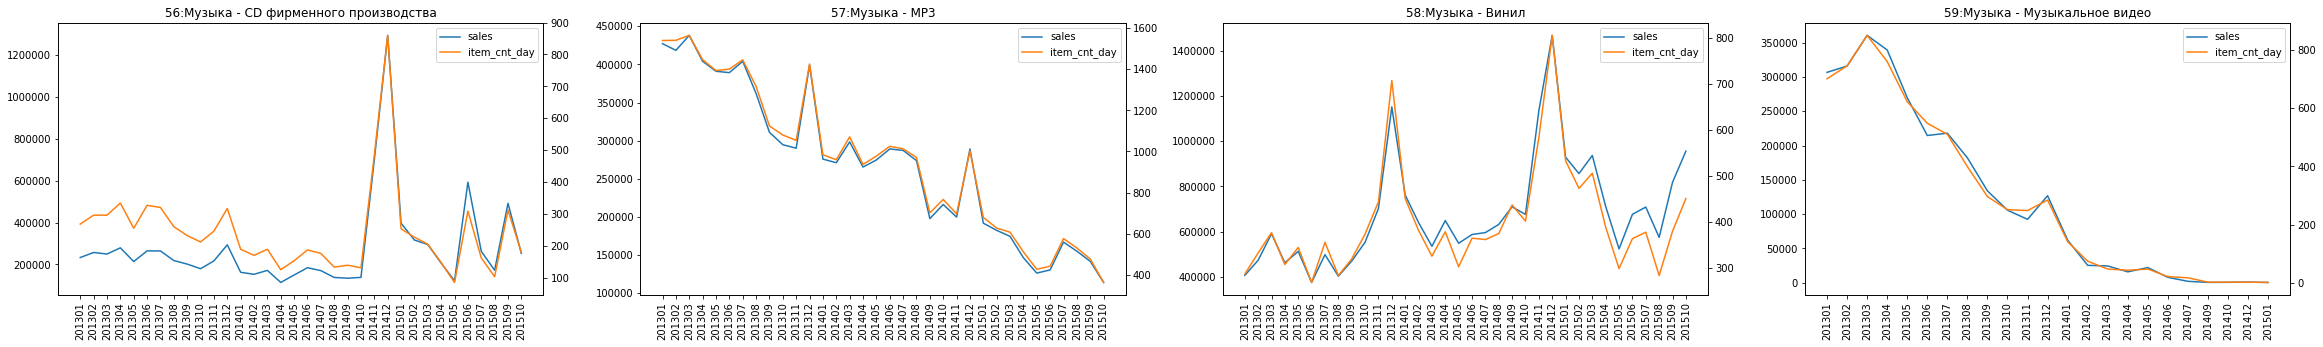

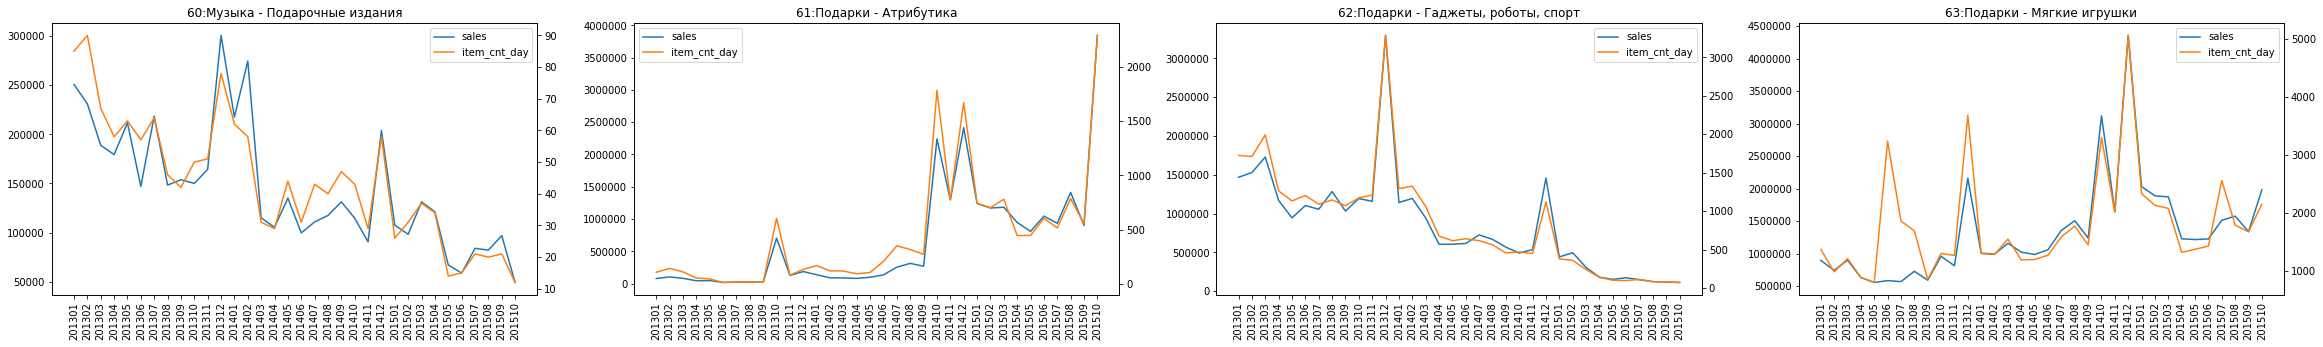

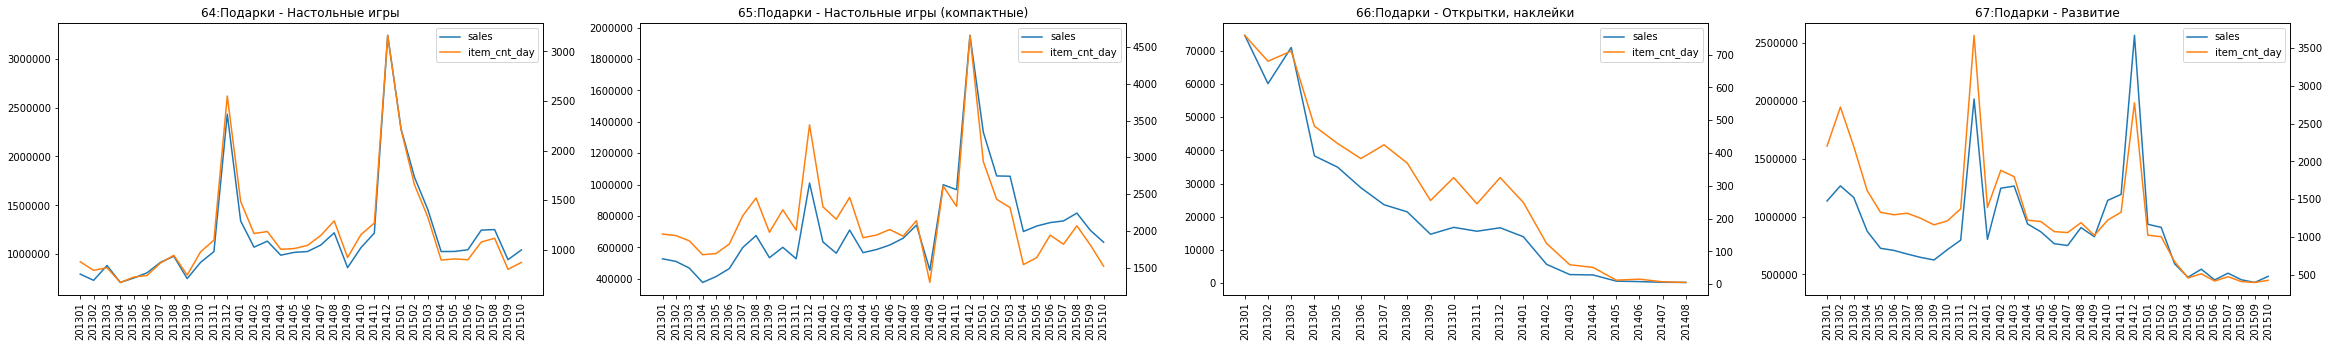

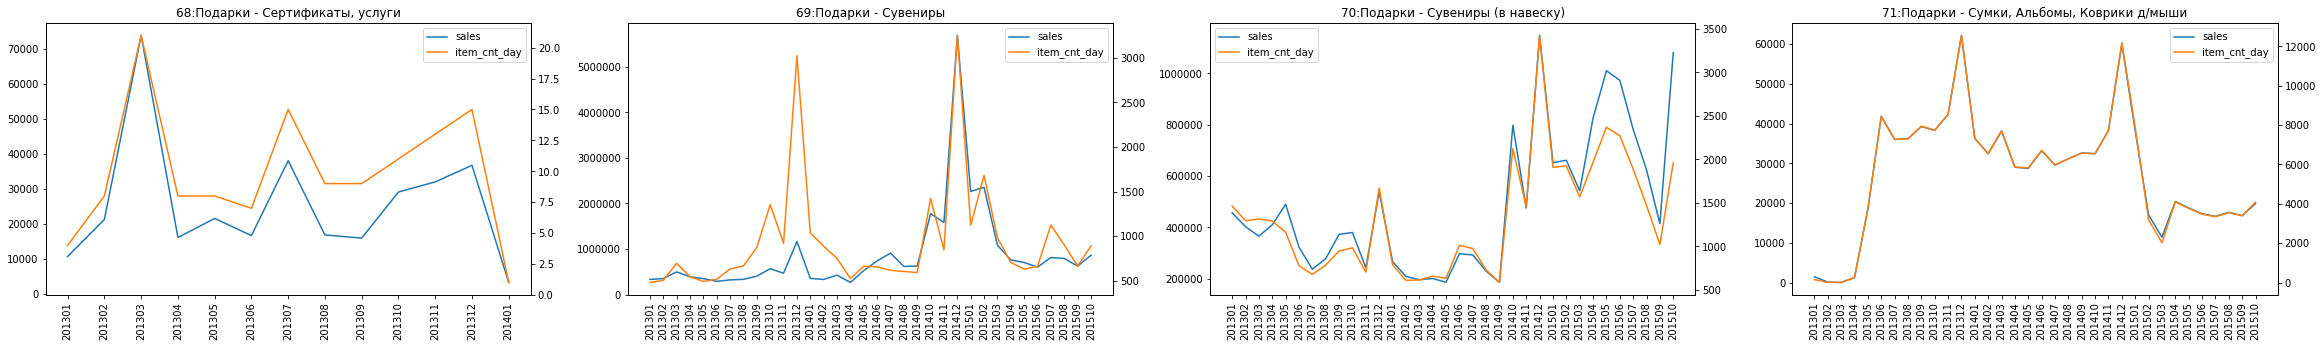

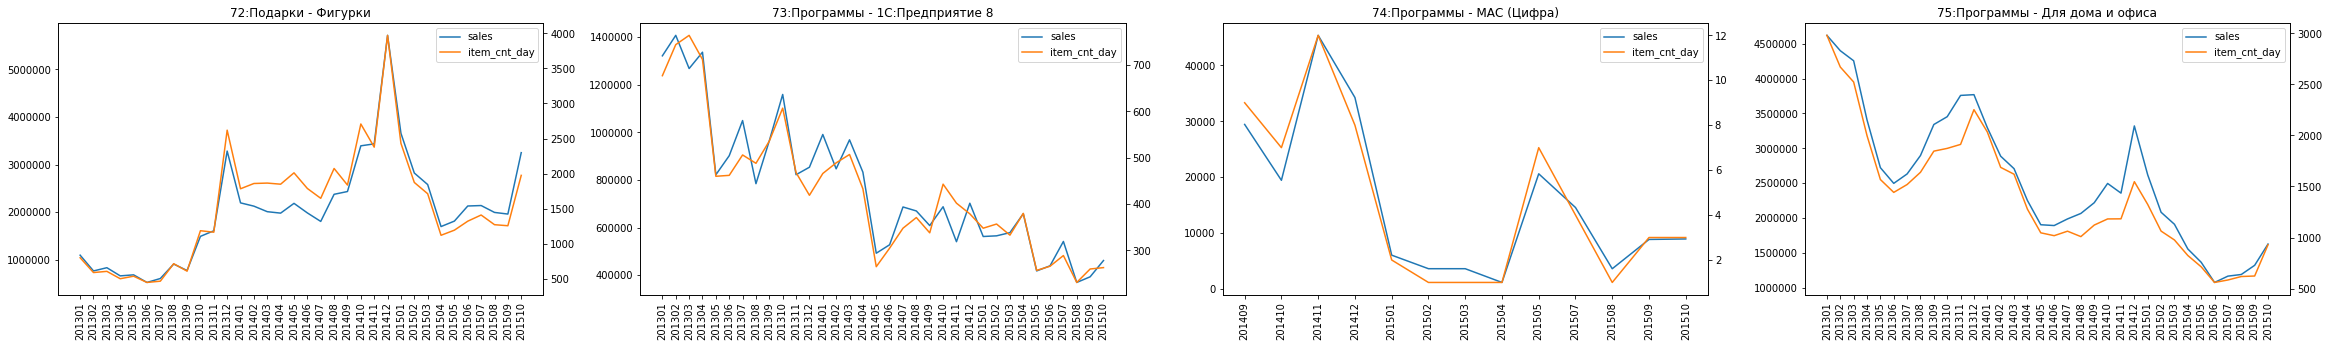

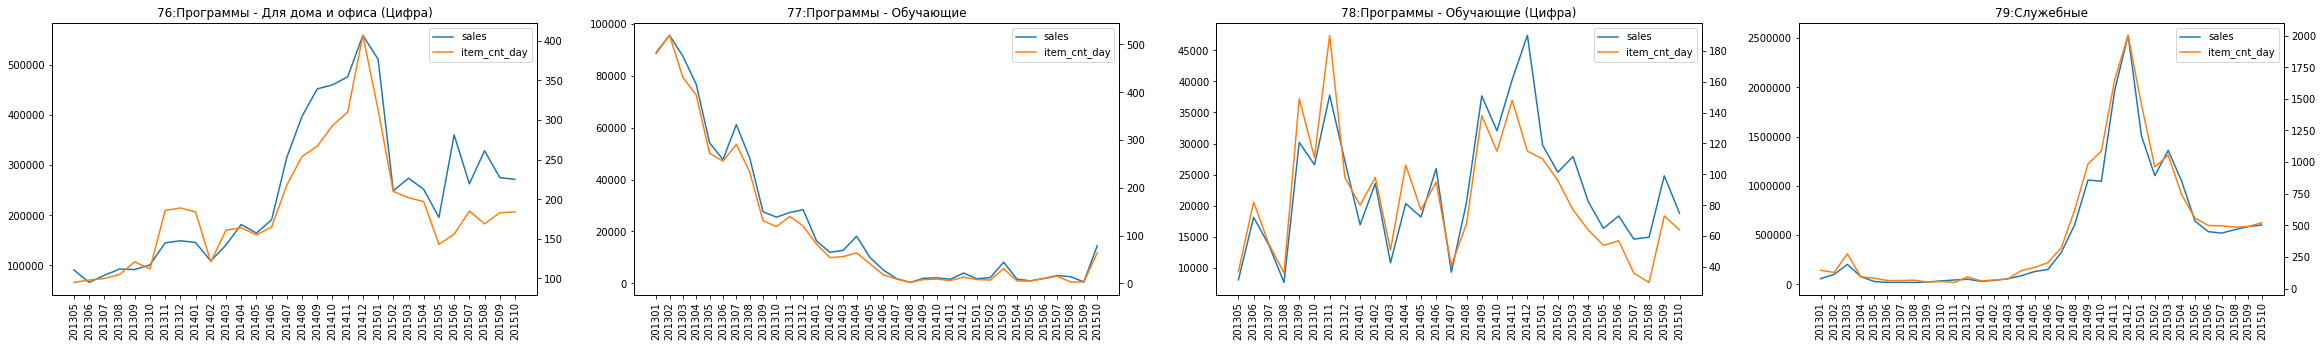

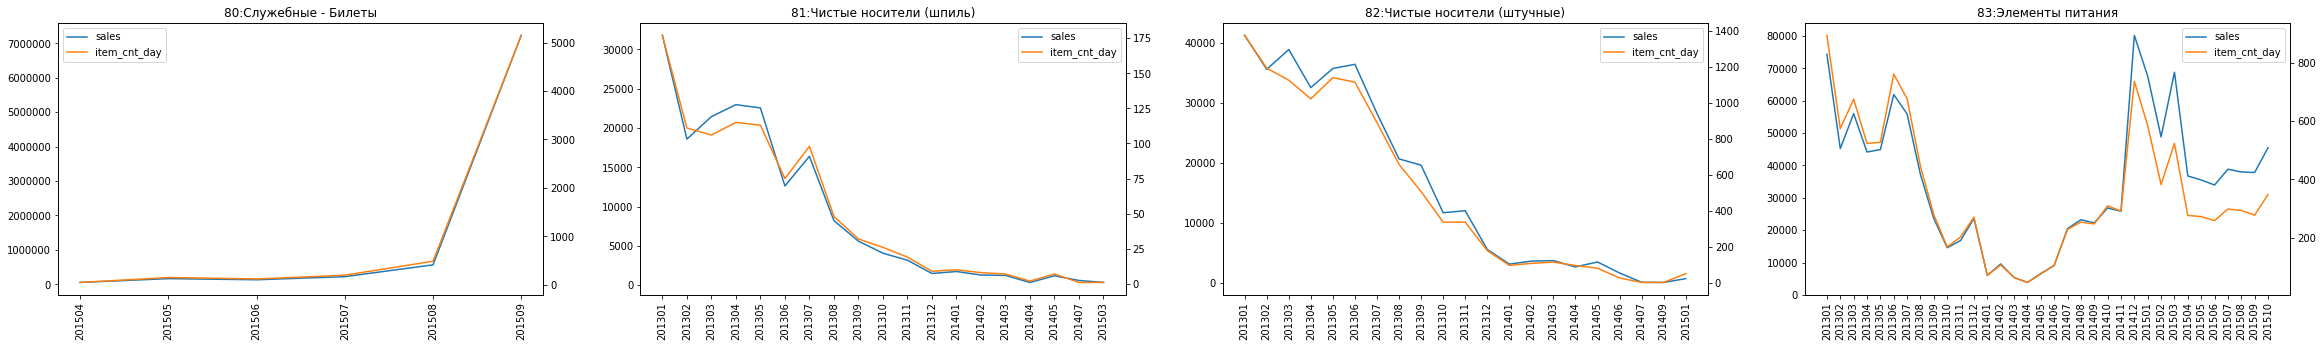

In [38]:
for i, (idd, name) in enumerate(dict_cat_name.items()):
    if i % 4 == 0:
        fig, axes = plt.subplots(1,4, figsize=(40,5))
    if len(df_train_month_cat.loc[idd]) > 0:
#         ax = df_train_month_cat.loc[idd].plot(, secondary_y=['sales'], )
        ax=axes[i%4]
        part_dt = df_train_month_cat.loc[idd]
        l1 = ax.plot(part_dt.index, part_dt['sales'], label="sales")
        for tick in ax.get_xticklabels():
            dum=tick.set_rotation(90)
        ax2 = ax.twinx()
        l2 = ax2.plot(part_dt.index, part_dt['item_cnt_day'],  color='tab:orange', label="item_cnt_day")
        ls = l1 + l2
        labs = [l.get_label() for l in ls]
        
        dum = ax.legend(ls, labs, loc=0)
        dum = ax.set_title(str(idd) + ':' + name)
        

## interesting id 
- 0 
- 1 
- 10 
- 27
- 50 
- 51
- 52

In [31]:
df_train_month_bigcats = df_train.groupby(['bigcat', 'date_month']).agg({"item_cnt_day": "sum", "sales": "sum"})
df_train_month_bigcats.head()

item_cnt_day                sales
big_cats date_month                                          
Access   201301                 3,575.00         5,408,616.78
         201302                 2,739.00         4,374,680.00
         201303                 2,544.00         4,081,323.60
         201304                 1,748.00         2,661,610.15
         201305                 1,639.00         2,432,901.60

In [32]:
bigcats_ids = df_train_month_bigcats.index.get_level_values(0).unique()

In [33]:
len(bigcats_ids)

20

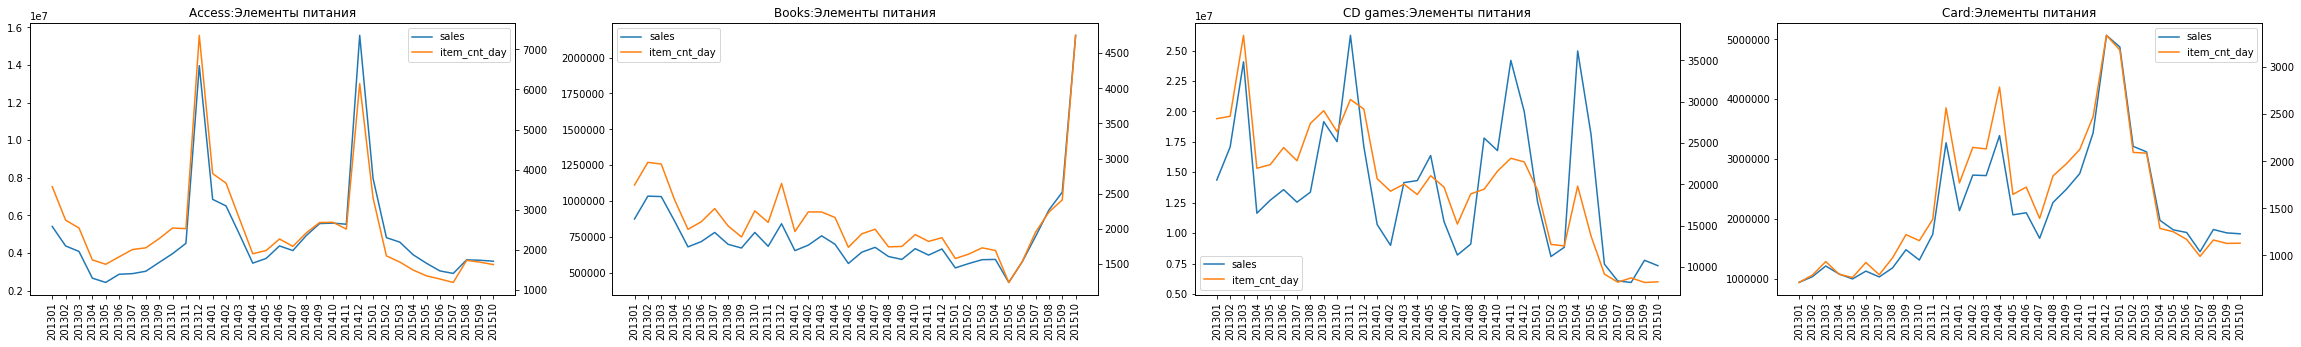

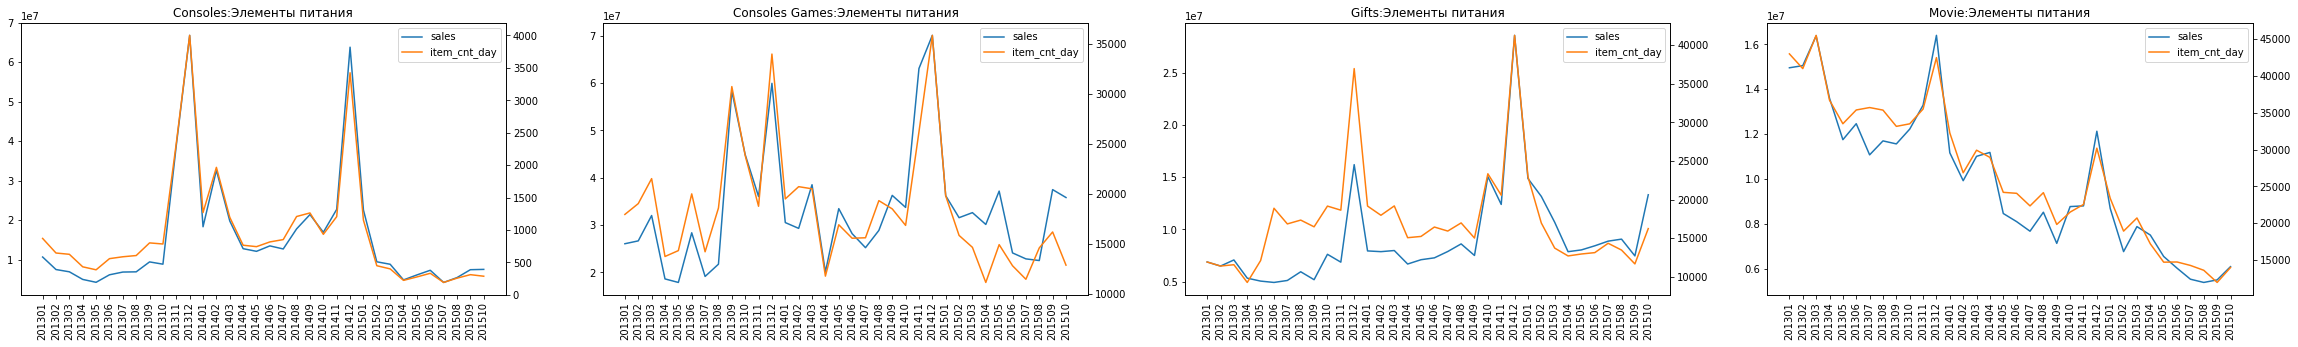

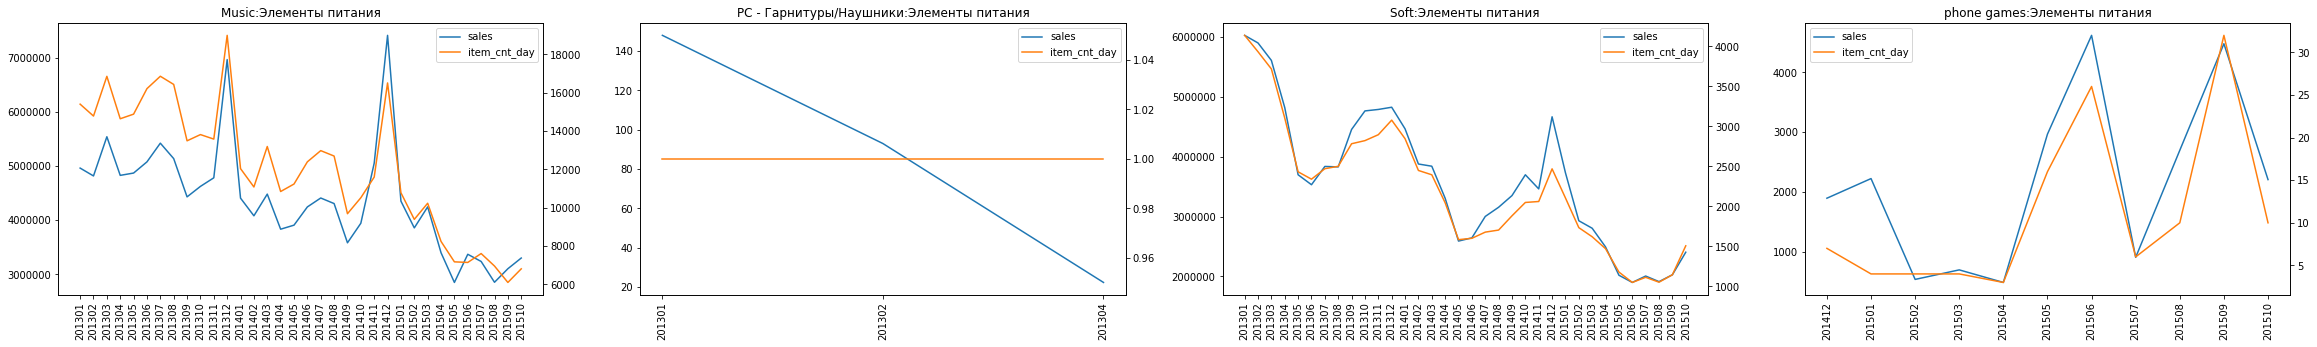

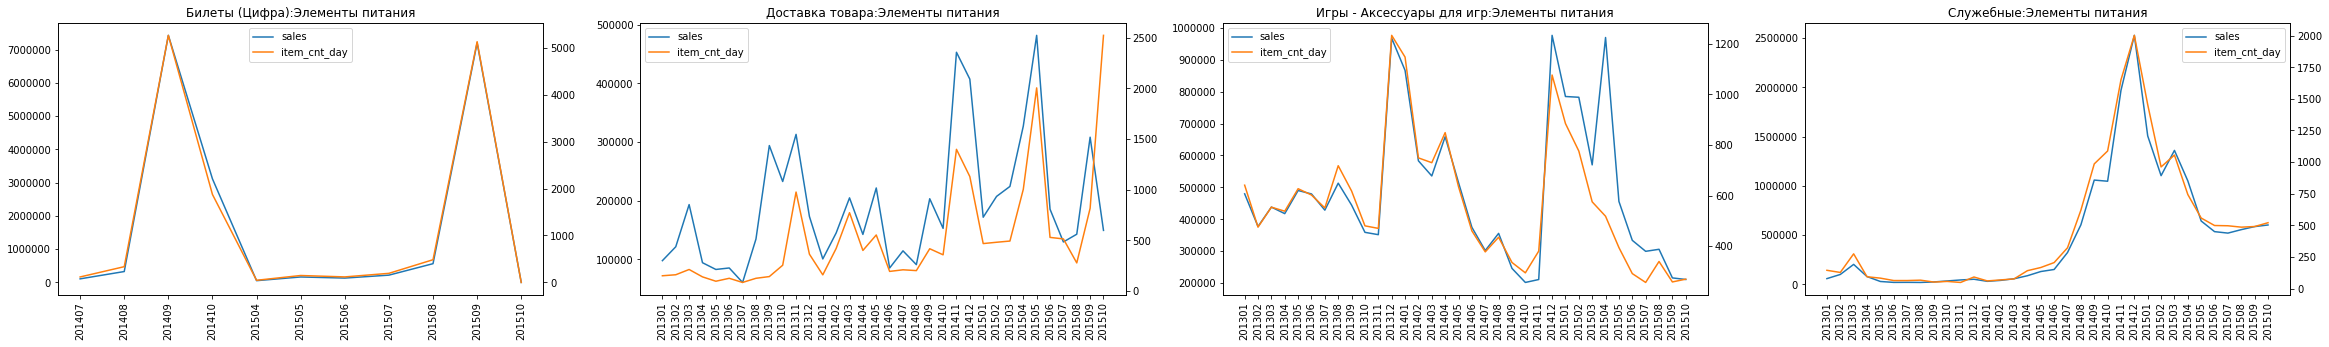

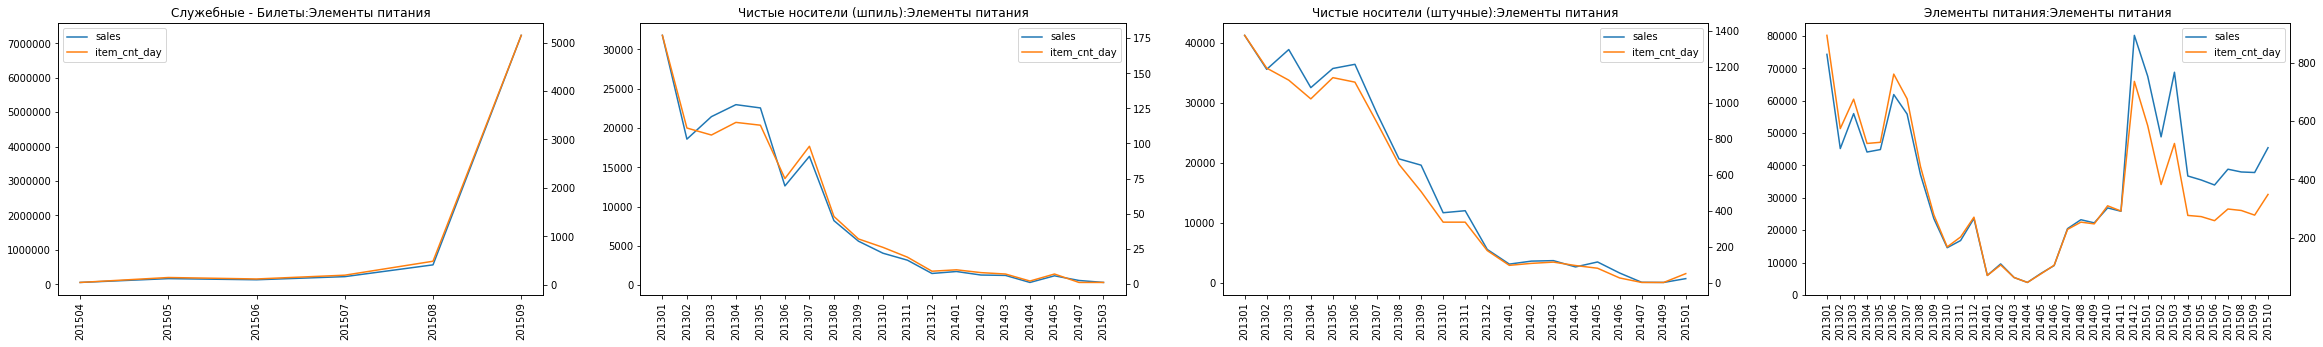

In [37]:
for i, idd in enumerate(bigcats_ids):
    if i % 4 == 0:
        fig, axes = plt.subplots(1,4, figsize=(40,5))
    if len(df_train_month_bigcats.loc[idd]) > 0:
#         ax = df_train_month_cat.loc[idd].plot(, secondary_y=['sales'], )
        ax=axes[i%4]
        part_dt = df_train_month_bigcats.loc[idd]
        l1 = ax.plot(part_dt.index, part_dt['sales'], label="sales")
        for tick in ax.get_xticklabels(): dum=tick.set_rotation(90)
        ax2 = ax.twinx()
        l2 = ax2.plot(part_dt.index, part_dt['item_cnt_day'],  color='tab:orange', label="item_cnt_day")
        
        ls = l1 + l2
        labs = [l.get_label() for l in ls] 
        dum = ax.legend(ls, labs, loc=0)
        dum = ax.set_title(str(idd) + ':' + name)

PC